# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.113403e+01     7.058019e+00
 * time: 0.004311084747314453
     1     2.905895e+01     4.314733e+00
 * time: 0.019643068313598633
     2     2.073349e+01     4.795755e+00
 * time: 0.03893899917602539
     3     1.415690e+01     4.173762e+00
 * time: 0.05756115913391113
     4     1.119188e+01     1.723054e+00
 * time: 0.07566118240356445
     5     1.056386e+01     2.784444e+00
 * time: 0.09089422225952148
     6     9.891888e+00     1.470550e+00
 * time: 0.10587811470031738
     7     9.338145e+00     1.453696e+00
 * time: 0.12107515335083008
     8     8.812672e+00     1.534378e+00
 * time: 0.13610315322875977
     9     8.548107e+00     8.797520e-01
 * time: 0.15113019943237305
    10     8.420093e+00     8.589507e-01
 * time: 0.16622400283813477
    11     8.294615e+00     6.104209e-01
 * time: 0.18137907981872559
    12     8.242334e+00     1.002601e+00
 * time: 0.1929631233215332
    13     8.188843e+00     5.554526e-01
 * time

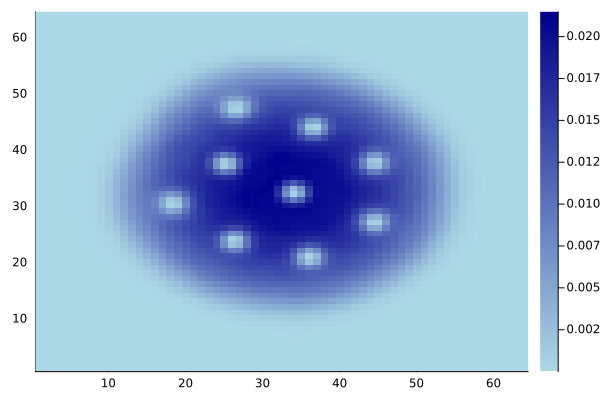

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)